In [ ]:
%pip install pandas
%pip install numpy 
%pip install statsmodels
%pip install matplotlib
%pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler


In [10]:
normalized_etf_yearly = pd.read_csv('../variables_of_interest/normalized_etf_yearly.csv')
acs_df = pd.read_csv('../acs_national_estimations_all.csv') 

## Process National Industry Trends

In [4]:
acs_df

,Year,Label (Grouping),Estimate
0,2010,"37 - Agriculture, forestry, fishing and huntin...",50952.557692
1,2010,39 - Manufacturing,301889.615385
2,2010,40 - Wholesale trade,84243.846154
3,2010,41 - Retail trade,316159.519231
4,2010,"42 - Transportation and warehousing, and utili...",138986.096154
...,...,...,...
60,2022,"37 - Agriculture, forestry, fishing and huntin...",50387.692308
61,2022,39 - Manufacturing,307193.903846
62,2022,40 - Wholesale trade,73975.923077
63,2022,41 - Retail trade,338628.923077


In [9]:
acs2_df = acs_df.copy()
acs2_df = acs2_df[acs2_df['Label (Grouping)'].isin(['37 - Agriculture, forestry, fishing and hunting, and mining', '39 - Manufacturing', '40 - Wholesale trade', '41 - Retail trade', '42 - Transportation and warehousing, and utilities'])]

acs2_df = acs2_df.pivot(index='Year', columns='Label (Grouping)', values='Estimate').reset_index()

acs2_df.columns.name = None
acs2_df = acs2_df.rename(columns={'37 - Agriculture, forestry, fishing and hunting, and mining': 'Agri_Forest_Fish',
                                '39 - Manufacturing' : 'Manufacturing',
                                '40 - Wholesale trade' : 'Wholesale Trade',
                                '41 - Retail trade' : 'Retail Trade',
                                '42 - Transportation and warehousing, and utilities' : 'Transport_Ware_Util' })

acs2_df
acs2_df.to_csv('../variables_of_interest/national_industry_trends.csv')

In [14]:
normalized_etf_yearly

,Unnamed: 0,Year,ETF,Price,Volatility
0,0,1999,Agri_Machinery_ETF,35.896562,18.041195
1,1,1999,Food_Beverage_ETF,38.574624,16.331450
2,2,1999,Investment_Funds_ETF,127.576142,21.784007
3,3,1999,Restaurant_FastFood_ETF,33.656642,12.122728
4,4,1999,Retail_ETF,16.157612,0.000000
...,...,...,...,...,...
125,125,2024,Agri_Machinery_ETF,275.591445,132.439912
126,126,2024,Food_Beverage_ETF,423.274203,272.971293
127,127,2024,Investment_Funds_ETF,383.809935,194.383929
128,128,2024,Restaurant_FastFood_ETF,1523.165088,812.518782


In [16]:
normalized_etf_yearly[['Year', 'ETF', 'Price']]

,Year,ETF,Price
0,1999,Agri_Machinery_ETF,35.896562
1,1999,Food_Beverage_ETF,38.574624
2,1999,Investment_Funds_ETF,127.576142
3,1999,Restaurant_FastFood_ETF,33.656642
4,1999,Retail_ETF,16.157612
...,...,...,...
125,2024,Agri_Machinery_ETF,275.591445
126,2024,Food_Beverage_ETF,423.274203
127,2024,Investment_Funds_ETF,383.809935
128,2024,Restaurant_FastFood_ETF,1523.165088


In [20]:
def merge_datasets(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index='Year', columns='ETF', values='Price').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on='Year', how='inner')
    return merged_data

temp_df2 = merge_datasets(acs2_df, normalized_etf_yearly[['Year', 'ETF', 'Price']])
temp_df2.to_csv("data/etf_normalized_vs_industry_trends.csv")
temp_df2

,Year,Agri_Forest_Fish,Manufacturing,Wholesale Trade,Retail Trade,Transport_Ware_Util,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,2010,50952.557692,301889.615385,84243.846154,316159.519231,138986.096154,61.678449,44.504493,102.766500,78.241386,55.456225
1,2011,51623.115385,296034.173077,80639.750000,316990.250000,138740.692308,79.667514,44.255090,109.279008,145.421338,62.292585
2,2012,52190.961538,292063.865385,77927.538462,318648.615385,137272.557692,87.597329,48.148766,118.940536,193.059748,89.656692
3,2013,52804.557692,287881.596154,76346.576923,318487.769231,135604.980769,96.385283,58.923661,142.139976,230.633694,100.834668
4,2014,54257.500000,289496.384615,76319.173077,322015.288462,136677.134615,97.784619,67.665027,177.515955,350.553272,67.455829
5,2015,55132.519231,293606.980769,76888.250000,326531.076923,139718.769231,83.722175,82.714692,191.236654,387.937927,87.330357
6,2016,54964.442308,296392.038462,77363.134615,330190.634615,143277.807692,88.686024,87.831202,194.304409,272.213151,82.903563
7,2017,54468.769231,299423.519231,78297.384615,332808.826923,148473.634615,117.115491,103.134290,233.581421,249.613016,63.331386
8,2018,53986.403846,300820.192308,77963.500000,334182.076923,154277.230769,125.432730,95.022750,266.890332,273.965688,78.154474
9,2019,53031.211538,302752.365385,77783.153846,334720.961538,160465.480769,125.592757,138.079579,284.004801,419.124110,98.058593


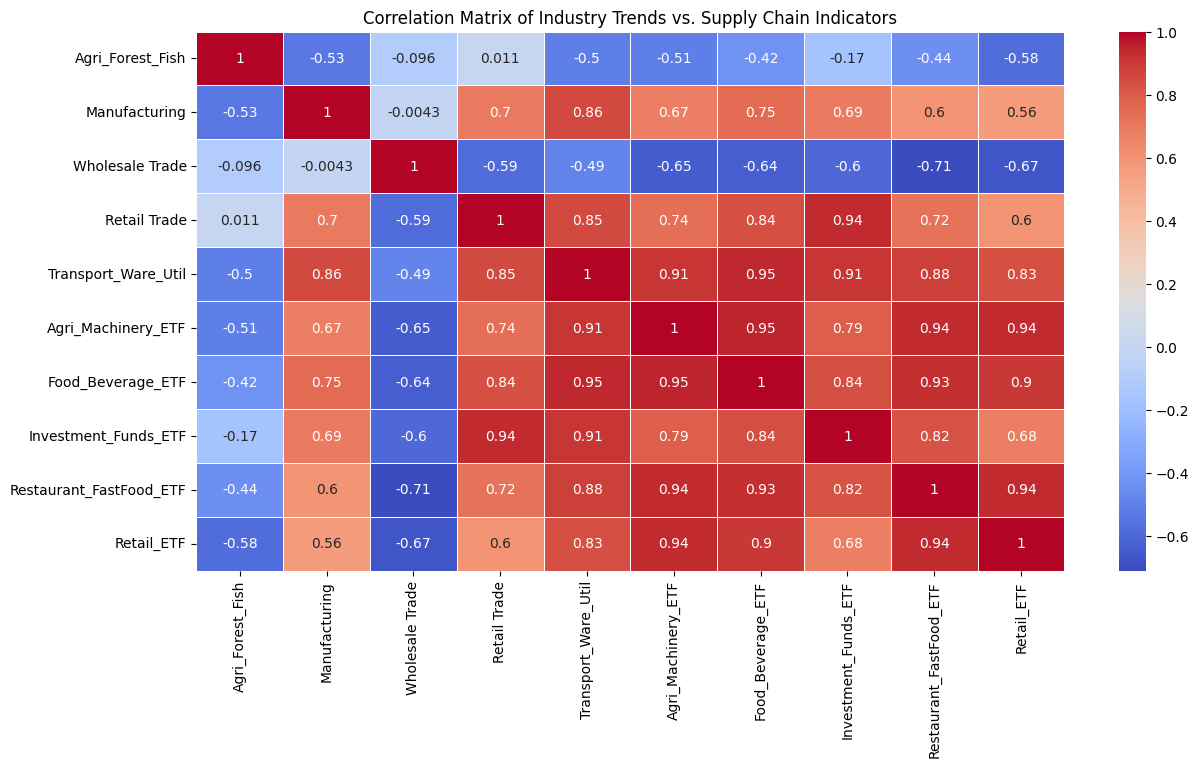

,Agri_Forest_Fish,Manufacturing,Wholesale Trade,Retail Trade,Transport_Ware_Util,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Agri_Forest_Fish,1.000000,-0.529303,-0.095973,0.010869,-0.504409,-0.505801,-0.422035,-0.165395,-0.437358,-0.580313
Manufacturing,-0.529303,1.000000,-0.004343,0.698003,0.856951,0.674538,0.747335,0.691277,0.597736,0.559812
Wholesale Trade,-0.095973,-0.004343,1.000000,-0.588232,-0.487318,-0.646560,-0.636011,-0.599210,-0.708997,-0.674072
Retail Trade,0.010869,0.698003,-0.588232,1.000000,0.853594,0.738347,0.835274,0.938192,0.723355,0.599320
Transport_Ware_Util,-0.504409,0.856951,-0.487318,0.853594,1.000000,0.907440,0.945569,0.908631,0.880650,0.833166
Agri_Machinery_ETF,-0.505801,0.674538,-0.646560,0.738347,0.907440,1.000000,0.949546,0.792716,0.937401,0.935905
Food_Beverage_ETF,-0.422035,0.747335,-0.636011,0.835274,0.945569,0.949546,1.000000,0.841271,0.930059,0.902926
Investment_Funds_ETF,-0.165395,0.691277,-0.599210,0.938192,0.908631,0.792716,0.841271,1.000000,0.823616,0.679401
Restaurant_FastFood_ETF,-0.437358,0.597736,-0.708997,0.723355,0.880650,0.937401,0.930059,0.823616,1.000000,0.939029
Retail_ETF,-0.580313,0.559812,-0.674072,0.599320,0.833166,0.935905,0.902926,0.679401,0.939029,1.000000


In [18]:
def plt_corr_matrix(df, question):
    numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'])    
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(14, 7))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix of {question}')
    plt.show()
    
    return corr_matrix

plt_corr_matrix(temp_df2, "Industry Trends vs. Supply Chain Indicators")

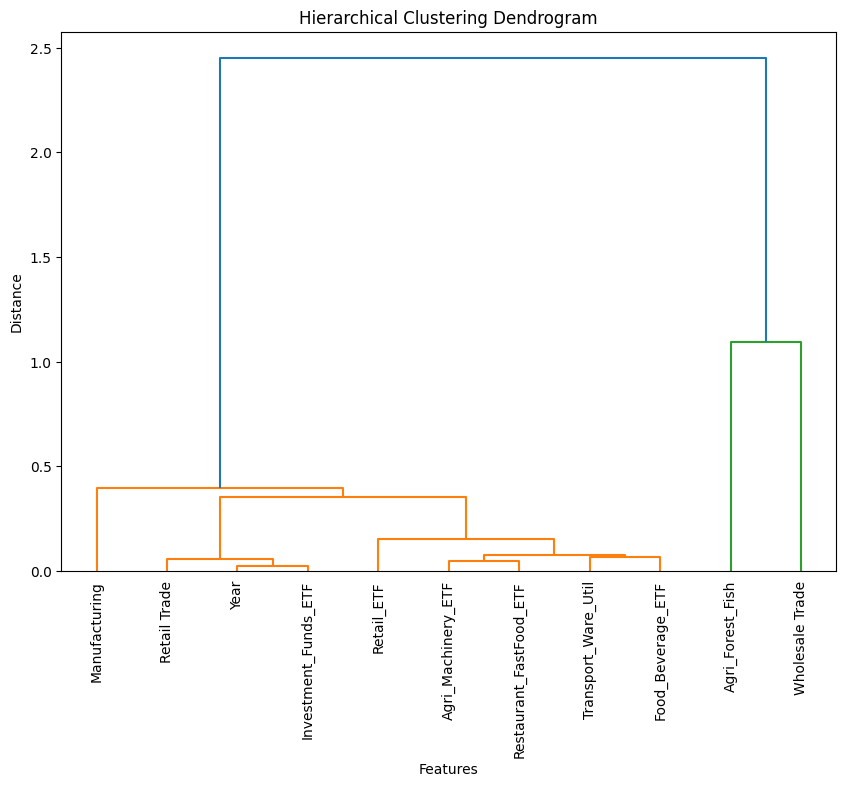

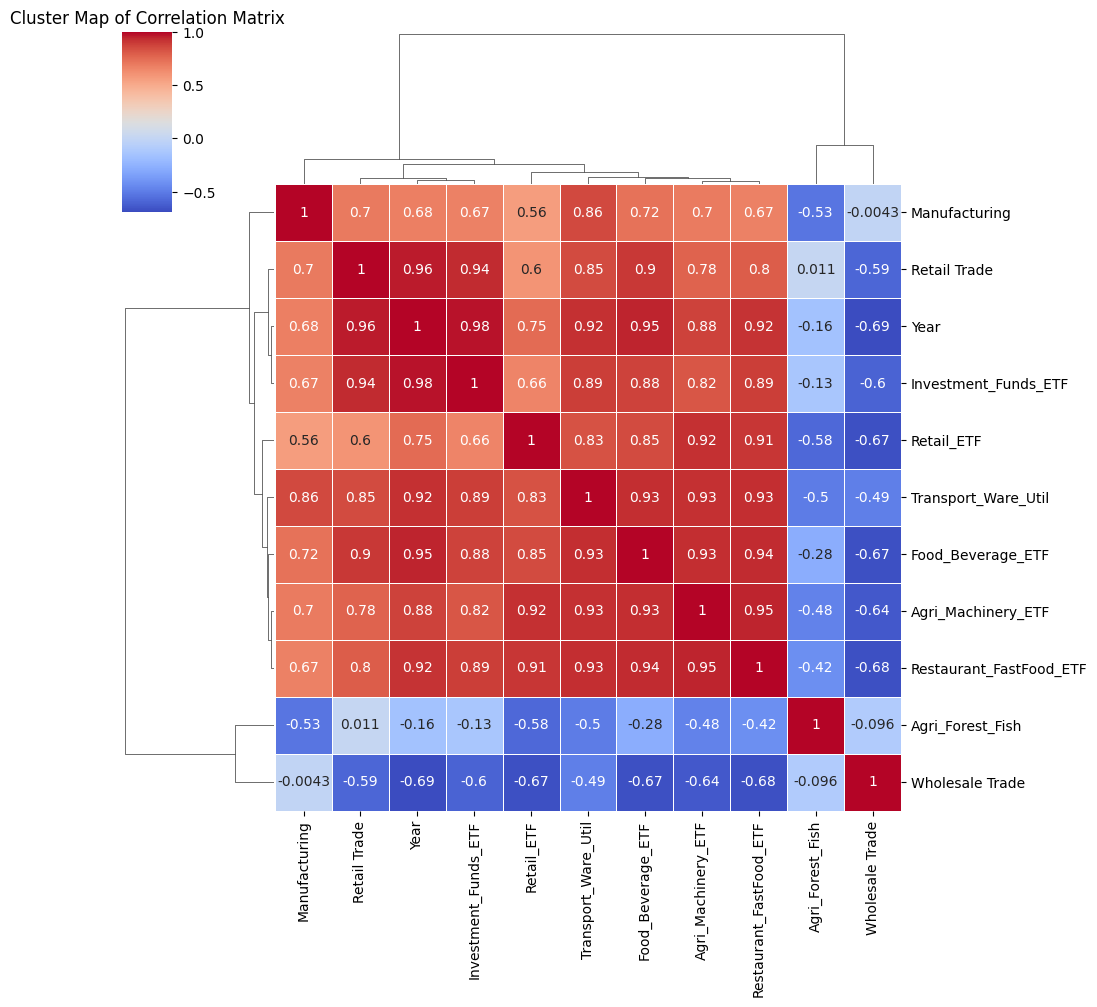

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

data = temp_df2.copy()

corr_matrix = data.corr()


distance_matrix = 1 - corr_matrix
distance_matrix = (distance_matrix + distance_matrix.T) / 2
Z = linkage(squareform(distance_matrix), method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z, labels=corr_matrix.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

sns.clustermap(corr_matrix, method='ward', cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Cluster Map of Correlation Matrix')
plt.show()